In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv")
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [3]:
df.shape

(19237, 18)

# Preprocessing

In [4]:
df.drop_duplicates(inplace=True)
df.shape

(18924, 18)

In [5]:
df2 = df[df["Price"]<50000]
df2.shape

(18016, 18)

## Cleaning Engine Volume

In [6]:
def Eng_Vol2(df3):
    turbo = []
    Engine_Volume = []
    for vol in df3["Engine volume"]:
        if len(vol)>4:
            turbo.append(1)
            vol = vol[0:3]
            Engine_Volume.append(float(vol))
        else:
            turbo.append(0)
            Engine_Volume.append(float(vol))
            
    df3.drop(columns = "Engine volume", inplace = True)
    df3["Engine volume"] = Engine_Volume
    df3["Turbo"] = turbo
    return df3 

## Cleaning Mileage

In [7]:
def mileage(df3):
    mile = []
    for mil in df3["Mileage"]:
        mil = mil[0:-3]
        mile.append(int(mil))

    df3.drop(columns = "Mileage", inplace = True)
    df3["Mileage"] = mile
    return df3

## Dropping ID and Cleaning Levy 

In [8]:
def drop_ID_n_clean_levy(df3):
    df3.drop(columns = "ID", inplace = True)
    df3["Levy"].replace(to_replace='-', value = np.nan, inplace = True)
    df3["Levy"] = pd.to_numeric(df3["Levy"])
    Levy_median = df3["Levy"].median()
    df3["Levy"].fillna(Levy_median, inplace = True )
    return df3, Levy_median

In [9]:
df2 = Eng_Vol2(df2)
df2 = mileage(df2)
df2, Levy_median = drop_ID_n_clean_levy(df2)
df2.describe()

C:\Ana\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-6-fbbcc2efe004>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["Engine volume"] = Engine_Volume
<ipython-input-6-fbbcc2efe004>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["Tu

,Price,Levy,Prod. year,Cylinders,Airbags,Engine volume,Turbo,Mileage
count,18016.000000,18016.000000,18016.000000,18016.000000,18016.000000,18016.000000,18016.000000,1.801600e+04
mean,14322.872003,859.321214,2010.695215,4.544738,6.564887,2.277825,0.092362,1.629709e+06
std,11758.530068,390.710590,5.615763,1.157580,4.320148,0.856101,0.289545,5.001581e+07
min,1.000000,87.000000,1939.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,4861.000000,707.000000,2009.000000,4.000000,4.000000,1.800000,0.000000,7.400000e+04
50%,12500.000000,779.000000,2012.000000,4.000000,6.000000,2.000000,0.000000,1.299945e+05
75%,20385.000000,891.000000,2014.000000,4.000000,12.000000,2.500000,0.000000,1.905490e+05
max,49889.000000,11714.000000,2020.000000,16.000000,16.000000,20.000000,1.000000,2.147484e+09


## Correlation Matrix and Heatmap

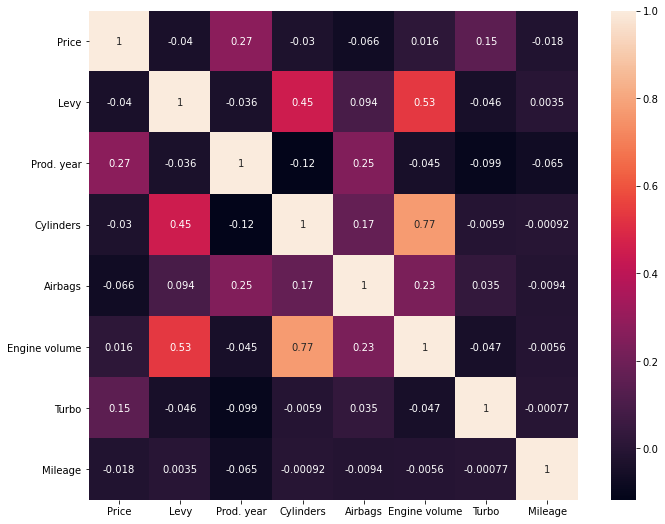

In [15]:
corrmat = df2.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True, annot = True);

## Target Encoding

In [10]:
def target_encoding(df3, categ_var):
    df4=df3
    enc_dict = {}
    for var in categ_var:
        encodings = df4.groupby(var)['Price'].median().reset_index()
        df4 = df4.merge(encodings, how='left', on=var)
        df4.drop(var, axis=1, inplace=True)
        df4.rename(columns = {"Price_y": var + "_enc", "Price_x": "Price"}, inplace = True) 
        enc_dict[var] = encodings
    return df4, enc_dict

In [11]:
def OneHot_encoding(df3, categ):
    
    df4 = df3
    dummy = pd.get_dummies(df4[categ])
    #df4 = df4.drop(columns = categ, axis=1)
    df4=pd.concat((df4,dummy),axis=1)
        
    return df4

## Handling Leather interior

In [12]:
#For Leather Interiors
def LI(df4):
    df4["Leather interior"].replace({"Yes":1, "No":0}, inplace = True)
    return df4

C:\Ana\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


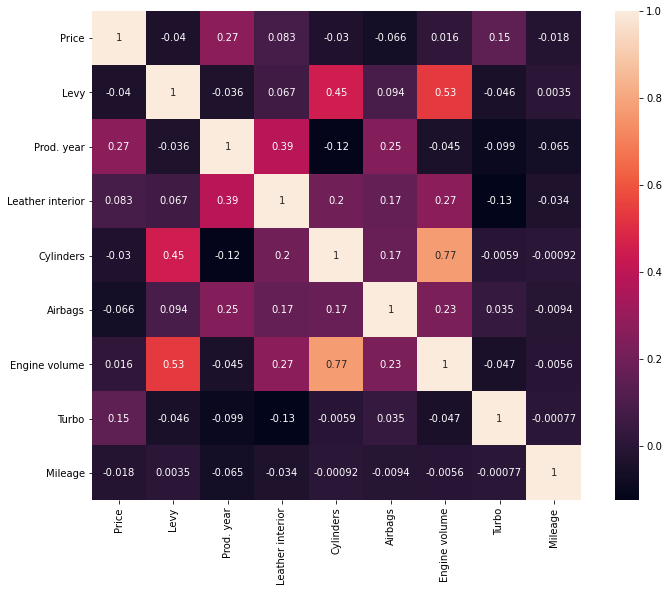

In [385]:
df3 = LI(df2)

corrmat = df3.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True, annot = True);

In [13]:
categ_variables = ["Model", "Color", "Manufacturer", "Category", "Fuel type", "Gear box type", "Drive wheels", "Doors","Wheel"]
one_hot_categ = ["Category", "Fuel type", "Gear box type", "Drive wheels", "Doors", "Wheel"]
target_categ = ["Model","Color","Manufacturer"]


In [14]:
####################################
########### NEW FEATURES ############
df3 = df2
#df3["is_Jeep"] = (df3["Category"] == 'Jeep').astype(int)
#df3["is_Sedan"] = (df3["Category"] == "Sedan").astype(int)
#df3["Fuel type_Diesel"] =  (df3["Fuel type"]=="Diesel").astype(int)
#df3["Fuel type_Hybrid"] =  (df3["Fuel type"]=="Hybrid").astype(int)
#df3["Fuel type_Petrol"] =  (df3["Fuel type"]=="Petrol").astype(int)
#df3["Gear box type_Tiptronic"] =  (df3["Gear box type"]=="Tiptronic").astype(int)
#df3.head()

In [67]:
#df4 = OneHot_encoding(df2, one_hot_categ)
df4, tar_enc_dict = target_encoding(df3, categ_variables)
df4 = LI(df4)

<AxesSubplot:>

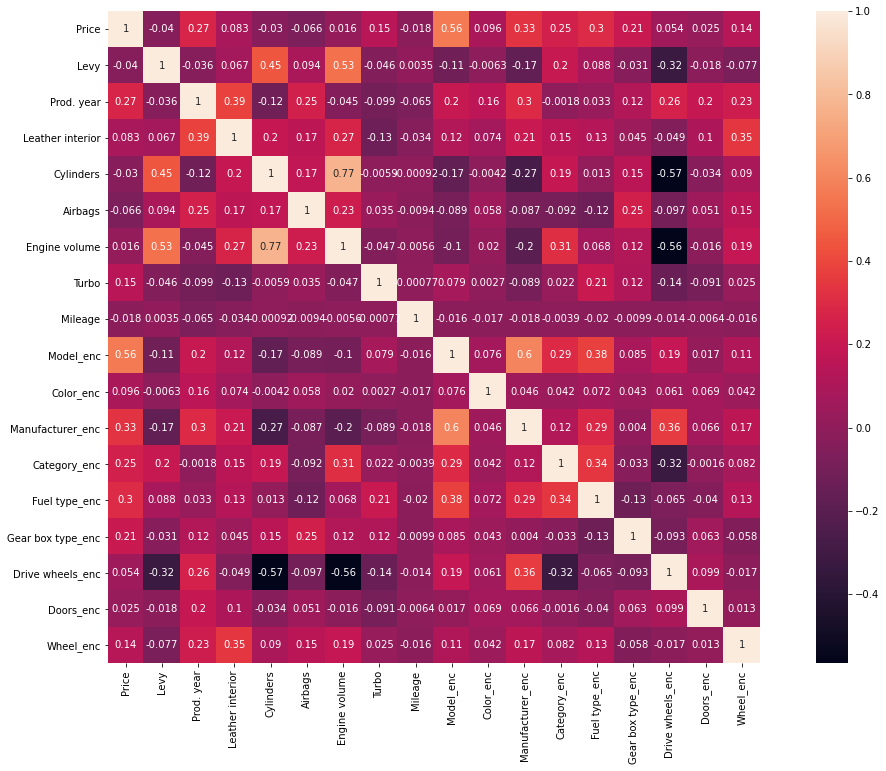

In [24]:
plt.figure(figsize =  (20,12))
sns.heatmap(df4.corr(), square = True, annot = True)

## Fixing Levy

In [68]:
# Fixing Levy
#df2 = df2[df2["Levy"]<6000]
#df2 = df2[df2["Levy"]>250]

levy = []
levy_max = df4.Levy.mean() + (3* df4.Levy.std())
levy_min = df4.Levy.mean() - (2* df4.Levy.std())
for l in df4["Levy"]:
    if l>2000:
        levy.append(levy_max)
    elif(l<77):
        levy.append(levy_min)
    else:
        levy.append(l)
        
df4.drop(columns = "Levy", inplace = True)
df4["Levy"] = levy
df4.shape

(18016, 18)

### Levy correction worked

# Trying to correct Model_enc

<AxesSubplot:xlabel='Model_enc', ylabel='Price'>

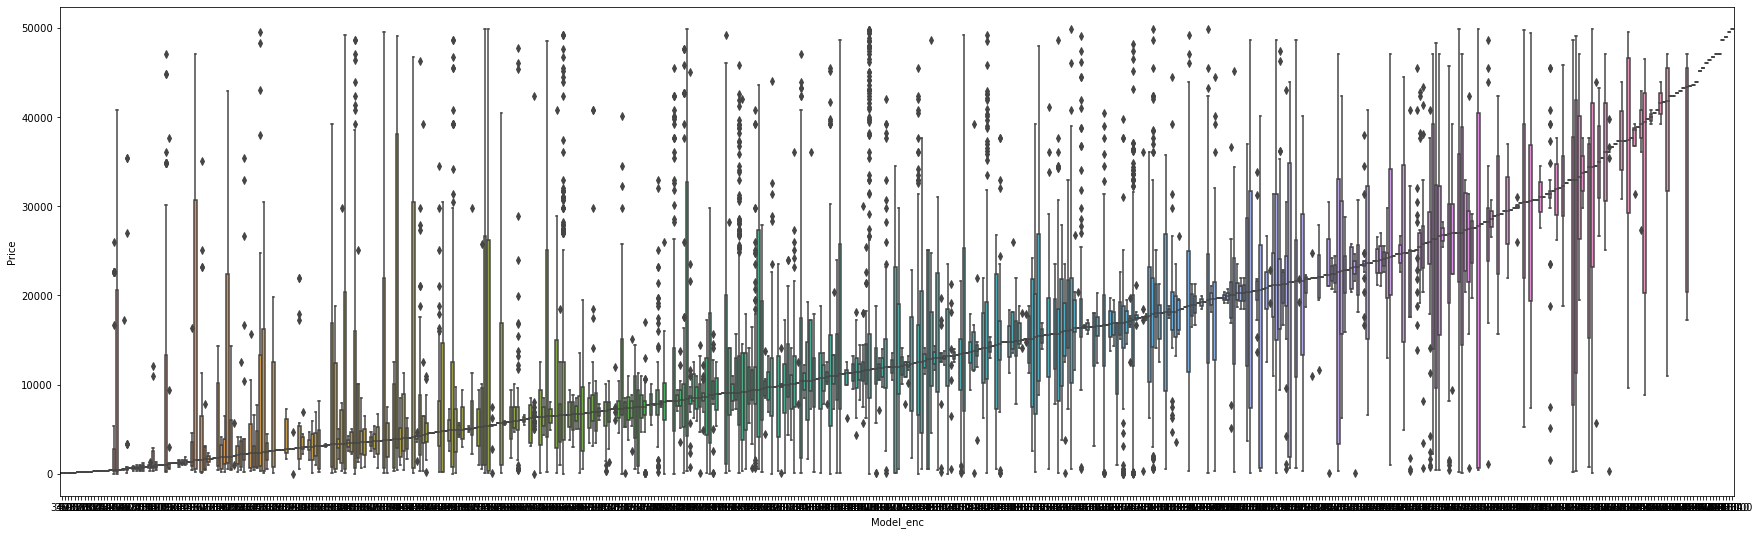

In [158]:
plt.figure(figsize =  (30,9))
sns.boxplot(x = df4["Model_enc"], y = df4["Price"])

In [30]:
###################################
Model_std = df4.groupby("Model_enc")["Price"].std().reset_index()
Model_std.fillna(0, inplace = True)

In [31]:
##################################
t_df = df4
for i, model in enumerate(t_df["Model_enc"]):
    mean_i =  model
    std_i = Model_std[Model_std["Model_enc"]==model]["Price"]
    if (t_df["Price"][i] > (mean_i + 3*std_i)).bool() or (t_df["Price"][i] < (mean_i - 3*std_i)).bool():
        t_df = t_df.drop(index = i)
t_df.shape
        
    

(17777, 18)

<AxesSubplot:xlabel='Model_enc', ylabel='Price'>

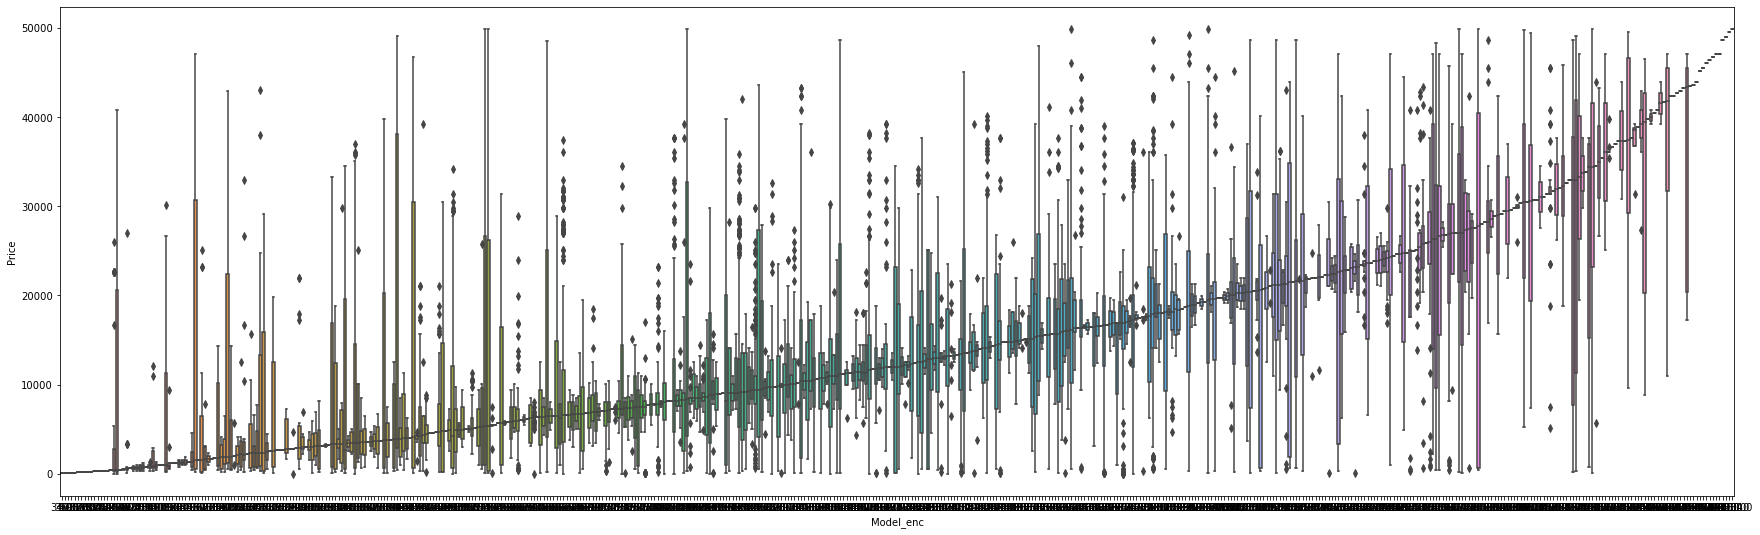

In [161]:
plt.figure(figsize =  (30,9))
sns.boxplot(x = t_df["Model_enc"], y = t_df["Price"])

### Model_enc correction worked

In [32]:
##########
df4 = t_df

In [33]:
#############
df4.reset_index()
df4.head()

,Price,Prod. year,Leather interior,Cylinders,Airbags,Engine volume,Turbo,Mileage,Model_enc,Color_enc,Manufacturer_enc,Category_enc,Fuel type_enc,Gear box type_enc,Drive wheels_enc,Doors_enc,Wheel_enc,Levy
0,13328,2010,1,6.0,12,3.5,0,186005,1019.0,12520.5,5018.0,15994.0,9722,11290,9879,12544.0,13172,1399.0
1,16621,2011,0,6.0,8,3.0,0,192000,2195.0,11996.0,13150.0,15994.0,11992,17876,9879,12544.0,13172,1018.0
2,8467,2006,0,4.0,2,1.3,0,200000,9095.0,11996.0,9408.0,10349.0,11992,13172,13172,12544.0,8467,779.0
3,3607,2011,1,4.0,0,2.5,0,168966,2430.5,13485.0,12544.0,15994.0,9722,11290,9879,12544.0,13172,862.0
4,11726,2014,1,4.0,4,1.3,0,91901,9095.0,12520.5,9408.0,10349.0,11992,11290,13172,12544.0,13172,446.0


<AxesSubplot:xlabel='Prod. year', ylabel='Price'>

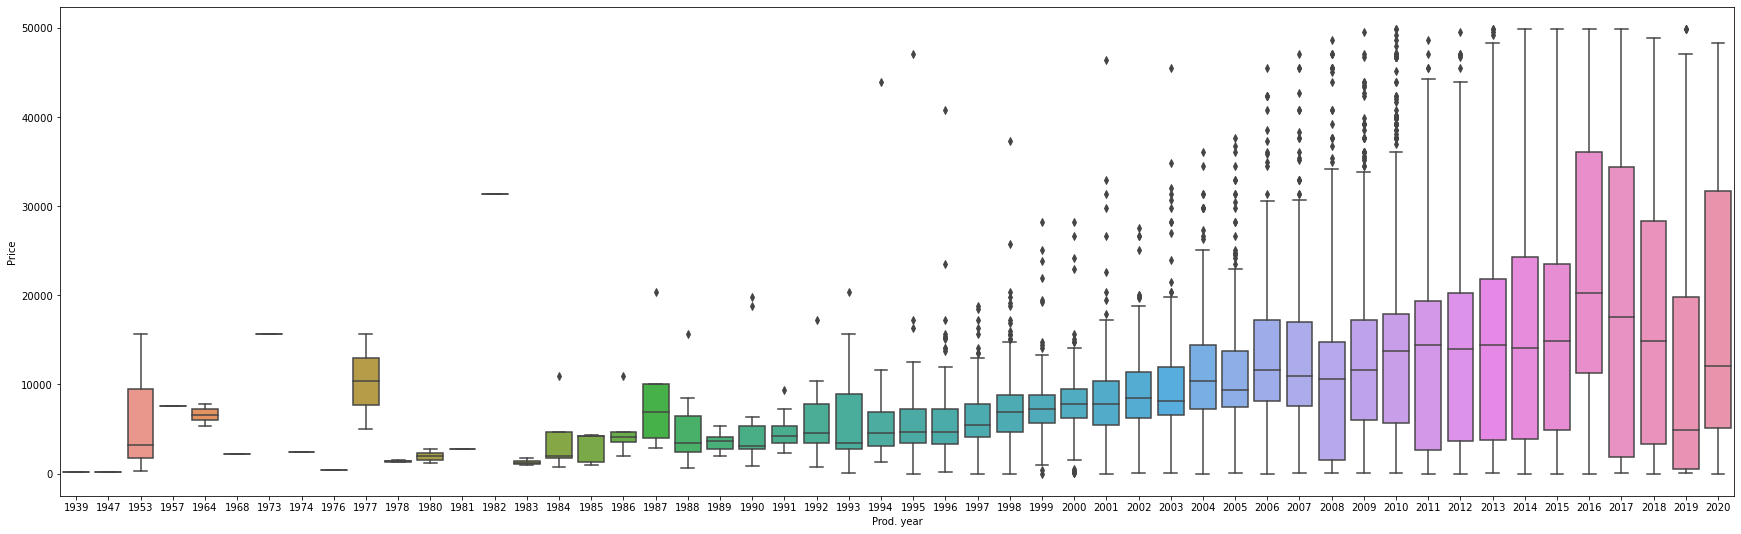

In [249]:
plt.figure(figsize =  (30,9))
sns.boxplot(x = df4["Prod. year"], y = df4["Price"])

In [38]:
#################################
Prod_std = df4.groupby("Prod. year")["Price"].std().reset_index()
Prod_std.fillna(0, inplace = True)

In [39]:
########################
Prod_mean = df4.groupby("Prod. year")["Price"].mean().reset_index()
Prod_mean.head()

,Prod. year,Price
0,1939,171.333333
1,1947,150.000000
2,1953,6398.333333
3,1957,7527.000000
4,1964,6585.500000


In [40]:
###########################
t_df = df4
for i, year in enumerate(t_df["Prod. year"]):
    mean_i =  Prod_mean[Prod_mean["Prod. year"]==year]["Price"]
    std_i = Prod_std[Prod_std["Prod. year"]==model]["Price"]
    if (t_df["Price"].iloc[i]> (mean_i + (2.5*std_i))).bool() | (t_df["Price"].iloc[i] < (mean_i - (2.5*std_i))).bool():
        t_df = t_df.drop(index = i)
t_df.shape

(17777, 18)

In [47]:
df4 = t_df

<AxesSubplot:xlabel='Prod. year', ylabel='Price'>

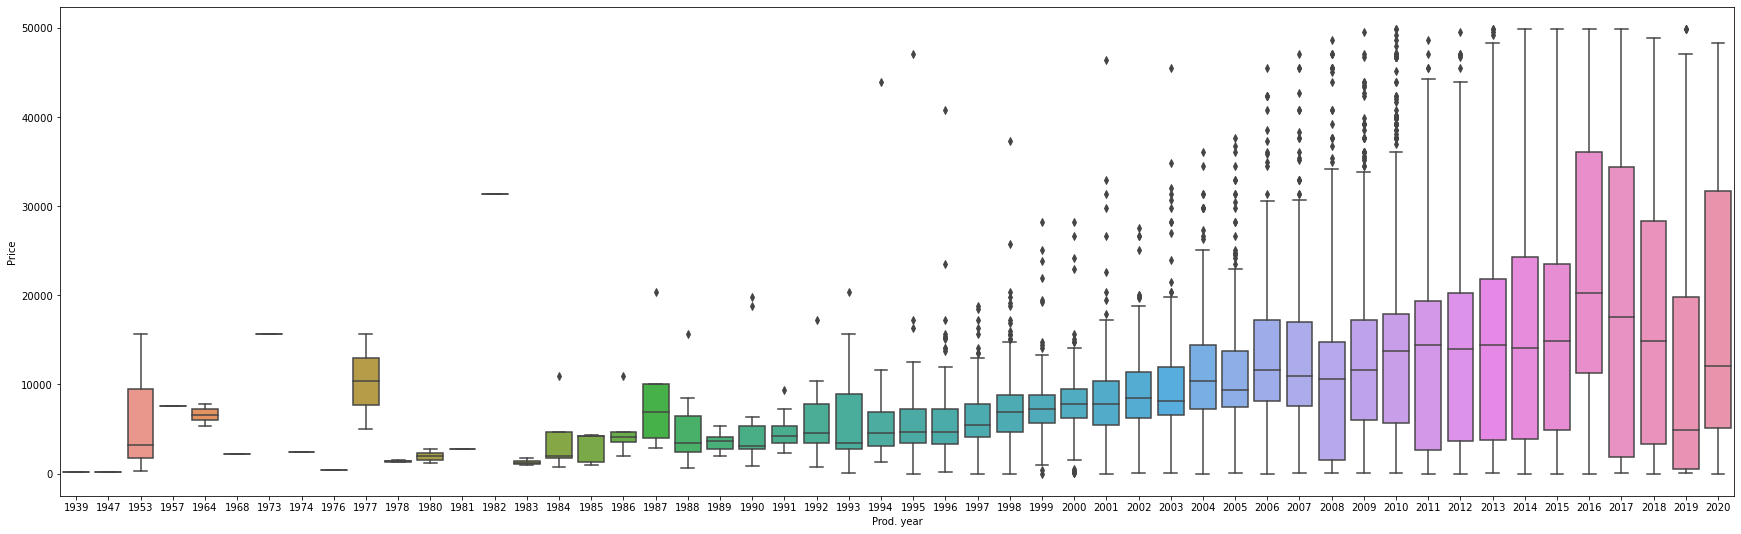

In [169]:
plt.figure(figsize =  (30,9))
sns.boxplot(x = t_df["Prod. year"], y = t_df["Price"])

### Prod. Year correction

In [170]:
df4["Price"].iloc[60]

20526

<AxesSubplot:xlabel='Airbags', ylabel='Price'>

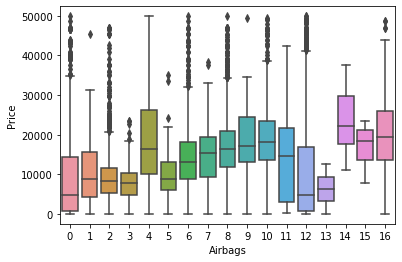

In [171]:
sns.boxplot(x = df4["Airbags"], y = df4["Price"])

In [69]:
##########################
i1 = df4[((df4["Airbags"]==0) & (df4["Price"]>40000)) | ((df4["Airbags"]==1) & (df4["Price"]>40000)) | ((df4["Airbags"]==2) & (df4["Price"]>29000))].index
i2 = df4[((df4["Airbags"]==5) & (df4["Price"]>28000)) | ((df4["Airbags"]==6) & (df4["Price"]>36000)) | ((df4["Airbags"]==7) & (df4["Price"]>35000))].index
i3 = df4[((df4["Airbags"]==8) | (df4["Airbags"]==9) | (df4["Airbags"]==10)) & (df4["Price"]>40000)].index

In [70]:
#############################
i4 = df4[((df4["Airbags"]==16) & (df4["Price"]>44000))].index
t_df = df4.drop(index = i1)
t_df = t_df.drop(index = i2)
t_df = t_df.drop(index = i3)
t_df = t_df.drop(index = i4)
t_df.shape

(17797, 18)

<AxesSubplot:xlabel='Airbags', ylabel='Price'>

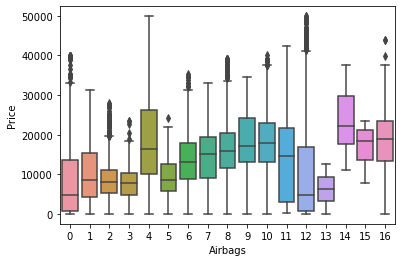

In [174]:
sns.boxplot(x = t_df["Airbags"], y = t_df["Price"])

In [71]:
##########################################
df4 = t_df

### AIrbags correction

### Mileage new feature below

In [72]:
###########################
t_df = df4
milea = []

for mil in df4["Mileage"]:
    if mil==0:
        milea.append(1)
    else:
        milea.append(0)

t_df["New Car"] = milea
t_df.head()

,Price,Prod. year,Leather interior,Cylinders,Airbags,Engine volume,Turbo,Mileage,Model_enc,Color_enc,Manufacturer_enc,Category_enc,Fuel type_enc,Gear box type_enc,Drive wheels_enc,Doors_enc,Wheel_enc,Levy,New Car
0,13328,2010,1,6.0,12,3.5,0,186005,1019.0,12520.5,5018.0,15994.0,9722,11290,9879,12544.0,13172,1399.0,0
1,16621,2011,0,6.0,8,3.0,0,192000,2195.0,11996.0,13150.0,15994.0,11992,17876,9879,12544.0,13172,1018.0,0
2,8467,2006,0,4.0,2,1.3,0,200000,9095.0,11996.0,9408.0,10349.0,11992,13172,13172,12544.0,8467,779.0,0
3,3607,2011,1,4.0,0,2.5,0,168966,2430.5,13485.0,12544.0,15994.0,9722,11290,9879,12544.0,13172,862.0,0
4,11726,2014,1,4.0,4,1.3,0,91901,9095.0,12520.5,9408.0,10349.0,11992,11290,13172,12544.0,13172,446.0,0


In [73]:
###################
df4 = t_df

# Feature Importance

In [350]:
from sklearn.ensemble import ExtraTreesRegressor

ETR = ExtraTreesRegressor()
df5 = df4
Y = df5["Price"].astype('float64')
X = df5.drop(columns = "Price", axis = 1)

ETR.fit(X,Y)

ExtraTreesRegressor()

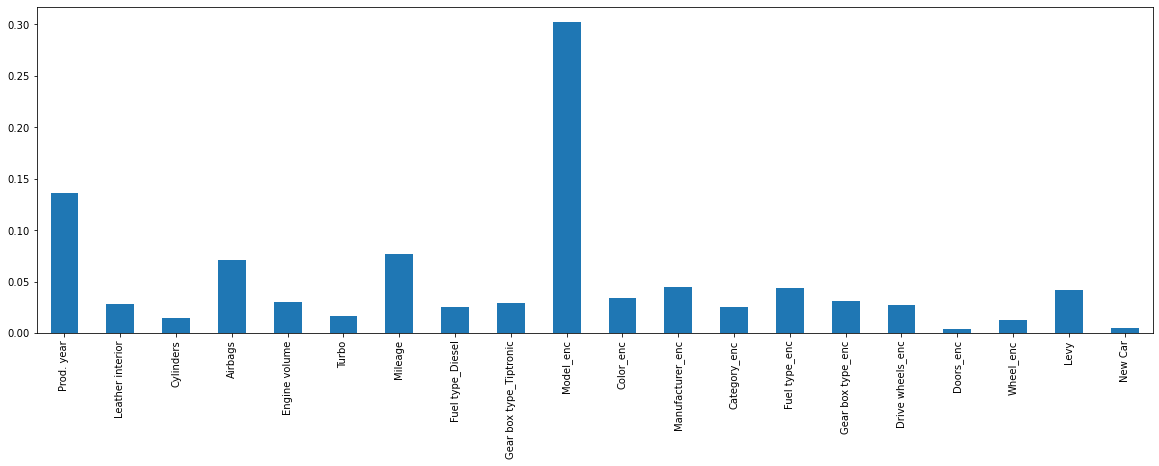

In [351]:
plt.figure(figsize = (20,6))
feat_imp = pd.Series(ETR.feature_importances_, index = X.columns)
feat_imp.plot(kind = 'bar')
plt.show()

<AxesSubplot:>

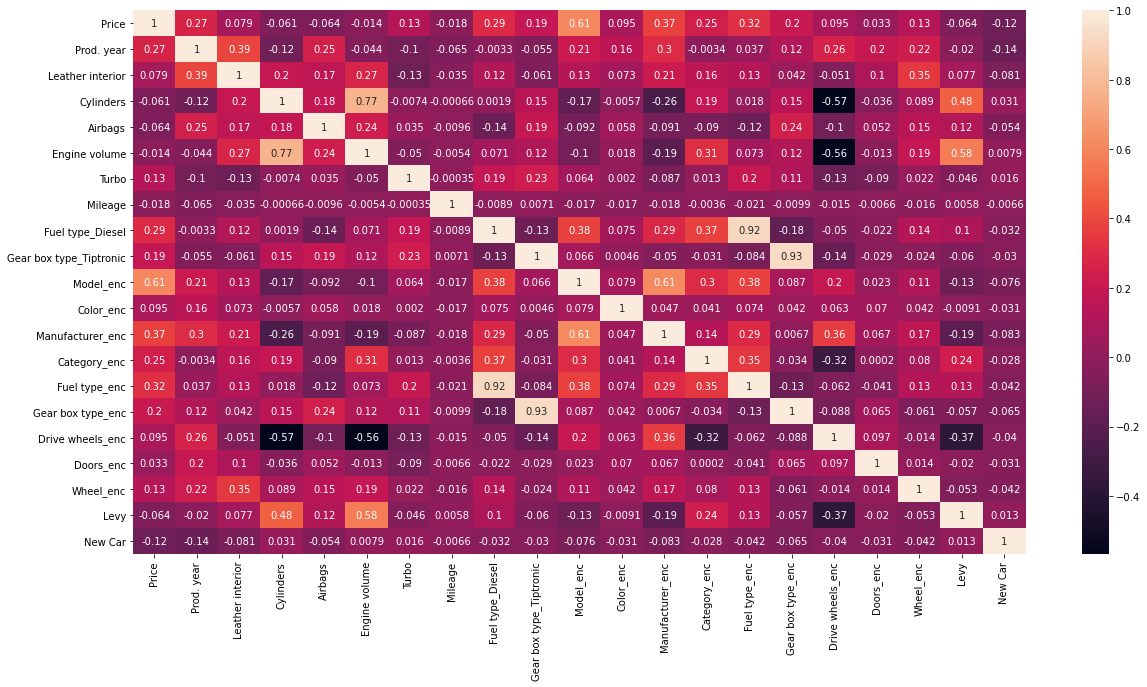

In [326]:
plt.figure(figsize = (20,10))
sns.heatmap(df4.corr(), annot = True)

### Trying to drop Drive Wheels enc

In [361]:
# Trying dropping Mileage and Levy

#df5 = df4.drop(columns = ["Drive wheels_enc"])

######### BAD IDEA #########

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_log_error, r2_score

## Model

In [17]:
model1 = LinearRegression()
#model2 = BayesianRidge()
model3 = RandomForestRegressor()
#model4 = SVR()

In [18]:
from xgboost import XGBRegressor, XGBRFRegressor
model5 = XGBRegressor()
model6 = XGBRFRegressor()

## Scaler

In [74]:
df5 = df4
Y = df5["Price"].astype('float64')
X = df5.drop(columns = "Price", axis = 1)

scaler = StandardScaler()
scaler2 = StandardScaler()
Y = np.array(Y)
Y = Y.reshape((-1,1))
y = scaler2.fit_transform(Y)

scaler.fit(X)
x = scaler.transform(X)

## Splitting

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.75, random_state = 7)

In [76]:
model3.fit(x_train, y_train)
y_pred = model3.predict(x_test)
train_pred = model3.predict(x_train)



<ipython-input-76-f30ba591e04d>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model3.fit(x_train, y_train)


In [77]:
############ WIth Levy, and airbags and new car
y_pred = scaler2.inverse_transform(y_pred)
train_pred = scaler2.inverse_transform(train_pred)
y_test = scaler2.inverse_transform(y_test)
y_train = scaler2.inverse_transform(y_train)


test_error = np.sqrt(mean_squared_log_error(y_pred, y_test))
train_error = np.sqrt(mean_squared_log_error(train_pred, y_train))
print("Test R2: ", r2_score(y_pred, y_test))
print("Train R2: ", r2_score(train_pred, y_train))
print("\n")
print("Test set error: ", test_error)
print("Train set error: ", train_error)

Test R2:  0.7334732681179577
Train R2:  0.9608508215052717


Test set error:  0.98268401736495
Train set error:  0.7640715190044942


In [66]:
############ WIth Levy, MOdel_enc and Prod_year and airbags, New Car

y_pred = scaler2.inverse_transform(y_pred)
train_pred = scaler2.inverse_transform(train_pred)
y_test = scaler2.inverse_transform(y_test)
y_train = scaler2.inverse_transform(y_train)


test_error = np.sqrt(mean_squared_log_error(y_pred, y_test))
train_error = np.sqrt(mean_squared_log_error(train_pred, y_train))
print("Test R2: ", r2_score(y_pred, y_test))
print("Train R2: ", r2_score(train_pred, y_train))
print("\n")
print("Test set error: ", test_error)
print("Train set error: ", train_error)

Test R2:  0.7577647653747241
Train R2:  0.9623453696249422


Test set error:  1.0175504136531832
Train set error:  0.7412217640739055


In [58]:
############ WIth Levy, MOdel_enc and Prod_year and airbags
y_pred = scaler2.inverse_transform(y_pred)
train_pred = scaler2.inverse_transform(train_pred)
y_test = scaler2.inverse_transform(y_test)
y_train = scaler2.inverse_transform(y_train)


test_error = np.sqrt(mean_squared_log_error(y_pred, y_test))
train_error = np.sqrt(mean_squared_log_error(train_pred, y_train))
print("Test R2: ", r2_score(y_pred, y_test))
print("Train R2: ", r2_score(train_pred, y_train))
print("\n")
print("Test set error: ", test_error)
print("Train set error: ", train_error)

#####Airbag has a good impact

Test R2:  0.7567441366068443
Train R2:  0.9630347612408834


Test set error:  1.020261115790525
Train set error:  0.740490009303987


In [51]:
################# WIth Levy, MOdel_enc and Prod_year
y_pred = scaler2.inverse_transform(y_pred)
train_pred = scaler2.inverse_transform(train_pred)
y_test = scaler2.inverse_transform(y_test)
y_train = scaler2.inverse_transform(y_train)


test_error = np.sqrt(mean_squared_log_error(y_pred, y_test))
train_error = np.sqrt(mean_squared_log_error(train_pred, y_train))
print("Test R2: ", r2_score(y_pred, y_test))
print("Train R2: ", r2_score(train_pred, y_train))
print("\n")
print("Test set error: ", test_error)
print("Train set error: ", train_error)

Test R2:  0.7309860246351733
Train R2:  0.9578277259571303


Test set error:  1.0309389883630218
Train set error:  0.7424047225213158


In [37]:
######################### With Levy and MOdel enc correction
y_pred = scaler2.inverse_transform(y_pred)
train_pred = scaler2.inverse_transform(train_pred)
y_test = scaler2.inverse_transform(y_test)
y_train = scaler2.inverse_transform(y_train)


test_error = np.sqrt(mean_squared_log_error(y_pred, y_test))
train_error = np.sqrt(mean_squared_log_error(train_pred, y_train))
print("Test R2: ", r2_score(y_pred, y_test))
print("Train R2: ", r2_score(train_pred, y_train))
print("\n")
print("Test set error: ", test_error)
print("Train set error: ", train_error)

Test R2:  0.7318707887759053
Train R2:  0.958349367127415


Test set error:  1.0279216264379658
Train set error:  0.7389495539051962


In [356]:
y_pred = scaler2.inverse_transform(y_pred)
train_pred = scaler2.inverse_transform(train_pred)
y_test = scaler2.inverse_transform(y_test)
y_train = scaler2.inverse_transform(y_train)


test_error = np.sqrt(mean_squared_log_error(y_pred, y_test))
train_error = np.sqrt(mean_squared_log_error(train_pred, y_train))
print("Test R2: ", r2_score(y_pred, y_test))
print("Train R2: ", r2_score(train_pred, y_train))
print("\n")
print("Test set error: ", test_error)
print("Train set error: ", train_error)

Test R2:  0.7558931405888305
Train R2:  0.9618336827526084


Test set error:  1.0233492182198631
Train set error:  0.7419892514516306


In [29]:
######################## with only Levy correction
y_pred = scaler2.inverse_transform(y_pred)
train_pred = scaler2.inverse_transform(train_pred)
y_test = scaler2.inverse_transform(y_test)
y_train = scaler2.inverse_transform(y_train)


test_error = np.sqrt(mean_squared_log_error(y_pred, y_test))
train_error = np.sqrt(mean_squared_log_error(train_pred, y_train))
print("Test R2: ", r2_score(y_pred, y_test))
print("Train R2: ", r2_score(train_pred, y_train))
print("\n")
print("Test set error: ", test_error)
print("Train set error: ", train_error)

Test R2:  0.7289762320382729
Train R2:  0.9579210490334602


Test set error:  1.0099708591494285
Train set error:  0.7513539298782064


## Trying Robust Scaler

In [454]:
df5 = df4
RS = RobustScaler()
RS2 = RobustScaler()
X = df5.drop(columns = "Price", axis = 1)
Y = df5["Price"].astype('float64')

Y = np.array(Y)
Y = Y.reshape((-1,1))
y = RS2.fit_transform(Y)

#X = X.drop(columns = ["Model_enc", "Manufacturer_enc"])
RS.fit(X)
x = RS.transform(X)

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.75, random_state = 7)

model3.fit(x_train, y_train)
y_pred = model3.predict(x_test)
train_pred = model3.predict(x_train)

y_pred = y_pred.reshape((-1,1))
y_pred = RS2.inverse_transform(y_pred)
train_pred = train_pred.reshape((-1,1))
train_pred = RS2.inverse_transform(train_pred)
y_test = RS2.inverse_transform(y_test)
y_train = RS2.inverse_transform(y_train)


test_error = np.sqrt(mean_squared_log_error(y_pred, y_test))
train_error = np.sqrt(mean_squared_log_error(train_pred, y_train))
print("Test R2: ", r2_score(y_pred, y_test))
print("Train R2: ", r2_score(train_pred, y_train))
print("\n")
print("Test set error: ", test_error)
print("Train set error: ", train_error)

# Hyperparameter Tuning

In [455]:
from sklearn.model_selection import RandomizedSearchCV


In [457]:
# Hyperparameters
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
max_feat = ["auto", "sqrt", "log2"]
max_depth = [int(x) for x in np.linspace(start=5, stop=20, num=10)]
min_sam_split = [2,5,10,15,50]
min_sam_leaf = [1,2,5,10]

In [460]:
random_grid = {'n_estimators': n_estimators,
                'max_depth': max_depth,
                'max_features': max_feat,
                'min_samples_split': min_sam_split,
                'min_samples_leaf': min_sam_leaf}

In [470]:
random_rf = RandomizedSearchCV(estimator=model3, param_distributions=random_grid, scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=7, n_jobs=1)

In [471]:
df5 = df4
Y = df5["Price"].astype('float64')
X = df5.drop(columns = "Price", axis = 1)

scaler = StandardScaler()
scaler2 = StandardScaler()
Y = np.array(Y)
Y = Y.reshape((-1,1))
y = scaler2.fit_transform(Y)

scaler.fit(X)
x = scaler.transform(X)

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.75, random_state = 7)

In [472]:
y_train = y_train.reshape((-1,))
random_rf.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=13, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   7.5s
[CV] END max_depth=13, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   7.5s
[CV] END max_depth=13, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   7.5s
[CV] END max_depth=13, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   7.5s
[CV] END max_depth=13, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   7.4s
[CV] END max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=900; total time=   3.6s
[CV] END max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=900; total time=   3.5s
[CV] END max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimat

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 6, 8, 10, 11, 13, 15,
                                                      16, 18, 20],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15, 50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=7, scoring='neg_mean_squared_error', verbose=2)

In [475]:
random_rf.best_params_


{'n_estimators': 1200,
 'min_samples_split': 10,
 'min_samples_leaf': 10,
 'max_features': 'log2',
 'max_depth': 16}

In [478]:
y_pred = random_rf.predict(x_test)
train_pred = random_rf.predict(x_train)

y_pred = scaler2.inverse_transform(y_pred)
train_pred = scaler2.inverse_transform(train_pred)
y_test = scaler2.inverse_transform(y_test)
y_train = scaler2.inverse_transform(y_train)


test_error = np.sqrt(mean_squared_log_error(y_pred, y_test))
train_error = np.sqrt(mean_squared_log_error(train_pred, y_train))
print("Test R2: ", r2_score(y_pred, y_test))
print("Train R2: ", r2_score(train_pred, y_train))
print("\n")
print("Test set error: ", test_error)
print("Train set error: ", train_error)

Test R2:  0.53228533489185
Train R2:  0.5988421914458211


Test set error:  1.262007434777549
Train set error:  1.2188059006179757


## Reading test set

In [78]:
test = pd.read_csv("test.csv")
test.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,44020629,-,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0 Turbo,0 km,4,Manual,Front,02-Mar,Left wheel,Grey,10,NaN
1,45784798,-,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,26000 km,4,Tiptronic,Front,04-May,Left wheel,Grey,10,NaN
2,45800257,-,NISSAN,Tiida,2005,Sedan,No,Petrol,1.5,168000 km,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8,NaN
3,45797981,975,VOLVO,XC90,2012,Jeep,Yes,Petrol,3.2,143000 km,6,Automatic,4x4,04-May,Left wheel,Blue,12,NaN
4,45814303,-,OPEL,Astra,1993,Hatchback,No,Petrol,1.6,200000 km,4,Manual,Front,04-May,Left wheel,Black,0,NaN


## Preprocessing the test set

### Engine Volume

In [79]:
test = Eng_Vol2(test)
test.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price,Engine volume,Turbo
0,44020629,-,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,0 km,4,Manual,Front,02-Mar,Left wheel,Grey,10,NaN,2.0,1
1,45784798,-,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,26000 km,4,Tiptronic,Front,04-May,Left wheel,Grey,10,NaN,2.4,0
2,45800257,-,NISSAN,Tiida,2005,Sedan,No,Petrol,168000 km,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8,NaN,1.5,0
3,45797981,975,VOLVO,XC90,2012,Jeep,Yes,Petrol,143000 km,6,Automatic,4x4,04-May,Left wheel,Blue,12,NaN,3.2,0
4,45814303,-,OPEL,Astra,1993,Hatchback,No,Petrol,200000 km,4,Manual,Front,04-May,Left wheel,Black,0,NaN,1.6,0


### Mileage

In [80]:
mile = []
for mil in test["Mileage"]:
    mil = mil[0:-3]
    mile.append(int(mil))

test.drop(columns = "Mileage", inplace = True)
test["Mileage"] = mile

### ID and Levy

In [81]:
test.drop(columns = "ID", inplace = True)
test["Levy"].replace(to_replace='-', value = np.nan, inplace = True)
test["Levy"] = pd.to_numeric(test["Levy"])
test["Levy"].fillna(Levy_median, inplace = True )

In [411]:
test['Model'].value_counts()

Sonata                 478
Prius                  448
Camry                  390
Elantra                378
E 350                  258
                      ... 
Tico                     1
i40                      1
DB7 Vantage Volante      1
S-type 3.0               1
CL 500                   1
Name: Model, Length: 995, dtype: int64

### Target Encoding

In [82]:
categ_var = ["Model", "Color", "Manufacturer", "Category", "Fuel type", "Gear box type", "Drive wheels", "Doors", "Wheel"]
t = test
for var in categ_var:
    #encodings = df4.groupby(var)['Price'].median().reset_index()
    t = t.merge(tar_enc_dict[var], how='left', on=var)
    t.drop(var, axis=1, inplace=True)
    t.rename(columns = {"Price_y": var + "_enc", "Price_x": "Price"}, inplace = True) 

### Leather interior and dropping price

In [83]:
#For Leather Interiors
t["Leather interior"].replace({"Yes":1, "No":0}, inplace = True)
t.drop(columns = "Price", inplace = True)
t.dtypes

Levy                 float64
Prod. year             int64
Leather interior       int64
Cylinders              int64
Airbags                int64
Engine volume        float64
Turbo                  int64
Mileage                int64
Model_enc            float64
Color_enc            float64
Manufacturer_enc     float64
Category_enc         float64
Fuel type_enc          int64
Gear box type_enc      int64
Drive wheels_enc       int64
Doors_enc            float64
Wheel_enc              int64
dtype: object

In [445]:
t.isnull().any()

Levy                 False
Prod. year           False
Leather interior     False
Cylinders            False
Airbags              False
Engine volume        False
Turbo                False
Mileage              False
Model_enc             True
Color_enc            False
Manufacturer_enc      True
Category_enc         False
Fuel type_enc        False
Gear box type_enc    False
Drive wheels_enc     False
Doors_enc            False
Wheel_enc            False
dtype: bool

In [84]:
model_med = tar_enc_dict["Model"]["Price"].median()
manufac_med = tar_enc_dict["Manufacturer"]["Price"].median()
t["Model_enc"] = t["Model_enc"].fillna(model_med)
t["Manufacturer_enc"] = t["Manufacturer_enc"].fillna(manufac_med)

In [85]:
################# FIXING LEVY
levy_t = []
for l in t["Levy"]:
    if l>2000:
        levy_t.append(levy_max)
    elif(l<77):
        levy_t.append(levy_min)
    else:
        levy_t.append(l)
        
t.drop(columns = "Levy", inplace = True)
t["Levy"] = levy_t
t.shape

(8245, 17)

In [86]:
########################### ADDING NEW CAR AS A FEATURE
milea = []

for mil in t["Mileage"]:
    if mil==0:
        milea.append(1)
    else:
        milea.append(0)

t["New Car"] = milea
t.shape

(8245, 18)

In [429]:
t.isnull().any()

Prod. year           False
Leather interior     False
Cylinders            False
Airbags              False
Engine volume        False
Turbo                False
Mileage              False
Model_enc            False
Color_enc            False
Manufacturer_enc     False
Category_enc         False
Fuel type_enc        False
Gear box type_enc    False
Drive wheels_enc     False
Doors_enc            False
Wheel_enc            False
Levy                 False
New Car              False
dtype: bool

In [139]:
enc_dict["Model"]["Price"].median()

13485.0

## Scale

In [87]:
x_t = scaler.transform(t)

In [88]:
y_t = model3.predict(x_t)

In [89]:
y_p = y_t.reshape((-1,1))
y_p = scaler2.inverse_transform(y_p)
y_p = pd.DataFrame(y_p)

In [90]:
y_p

,0
0,17911.580000
1,16418.913333
2,7590.225000
3,8305.260000
4,4528.750000
...,...
8240,10555.870000
8241,17368.640000
8242,499.150516
8243,36148.900000


In [91]:
y_p.to_csv("submission10later.csv", header = ["Price"], index = False)